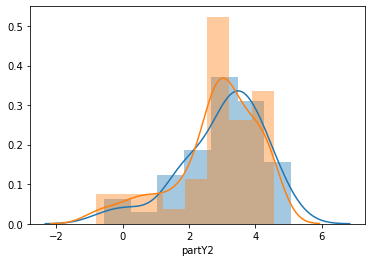

In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.formula.api import ols
from scipy import stats as sst

#Don't include in script.
bs_data = pd.read_csv('brainsize.csv', sep = ';', index_col=0, na_values = '.')

# Add column of random noise
np.random.seed(931)
#bs_data['partY'] = sst.norm(0,1,bs_data.shape[0])
bs_data['partY'] = np.log(np.random.exponential(30,bs_data.shape[0]))
np.random.seed(256)
bs_data['partY2'] = np.log(np.random.exponential(30,bs_data.shape[0]))
#bs_data['partY'] = np.random.normal(0,1,bs_data.shape[0]) + np.random.exponential(300,bs_data.shape[0])
#bs_data['partY'] = np.random.binomial(2, 0.66, bs_data.shape[0])
#bs_data
sns.distplot(bs_data['partY'])
sns.distplot(bs_data['partY2'])



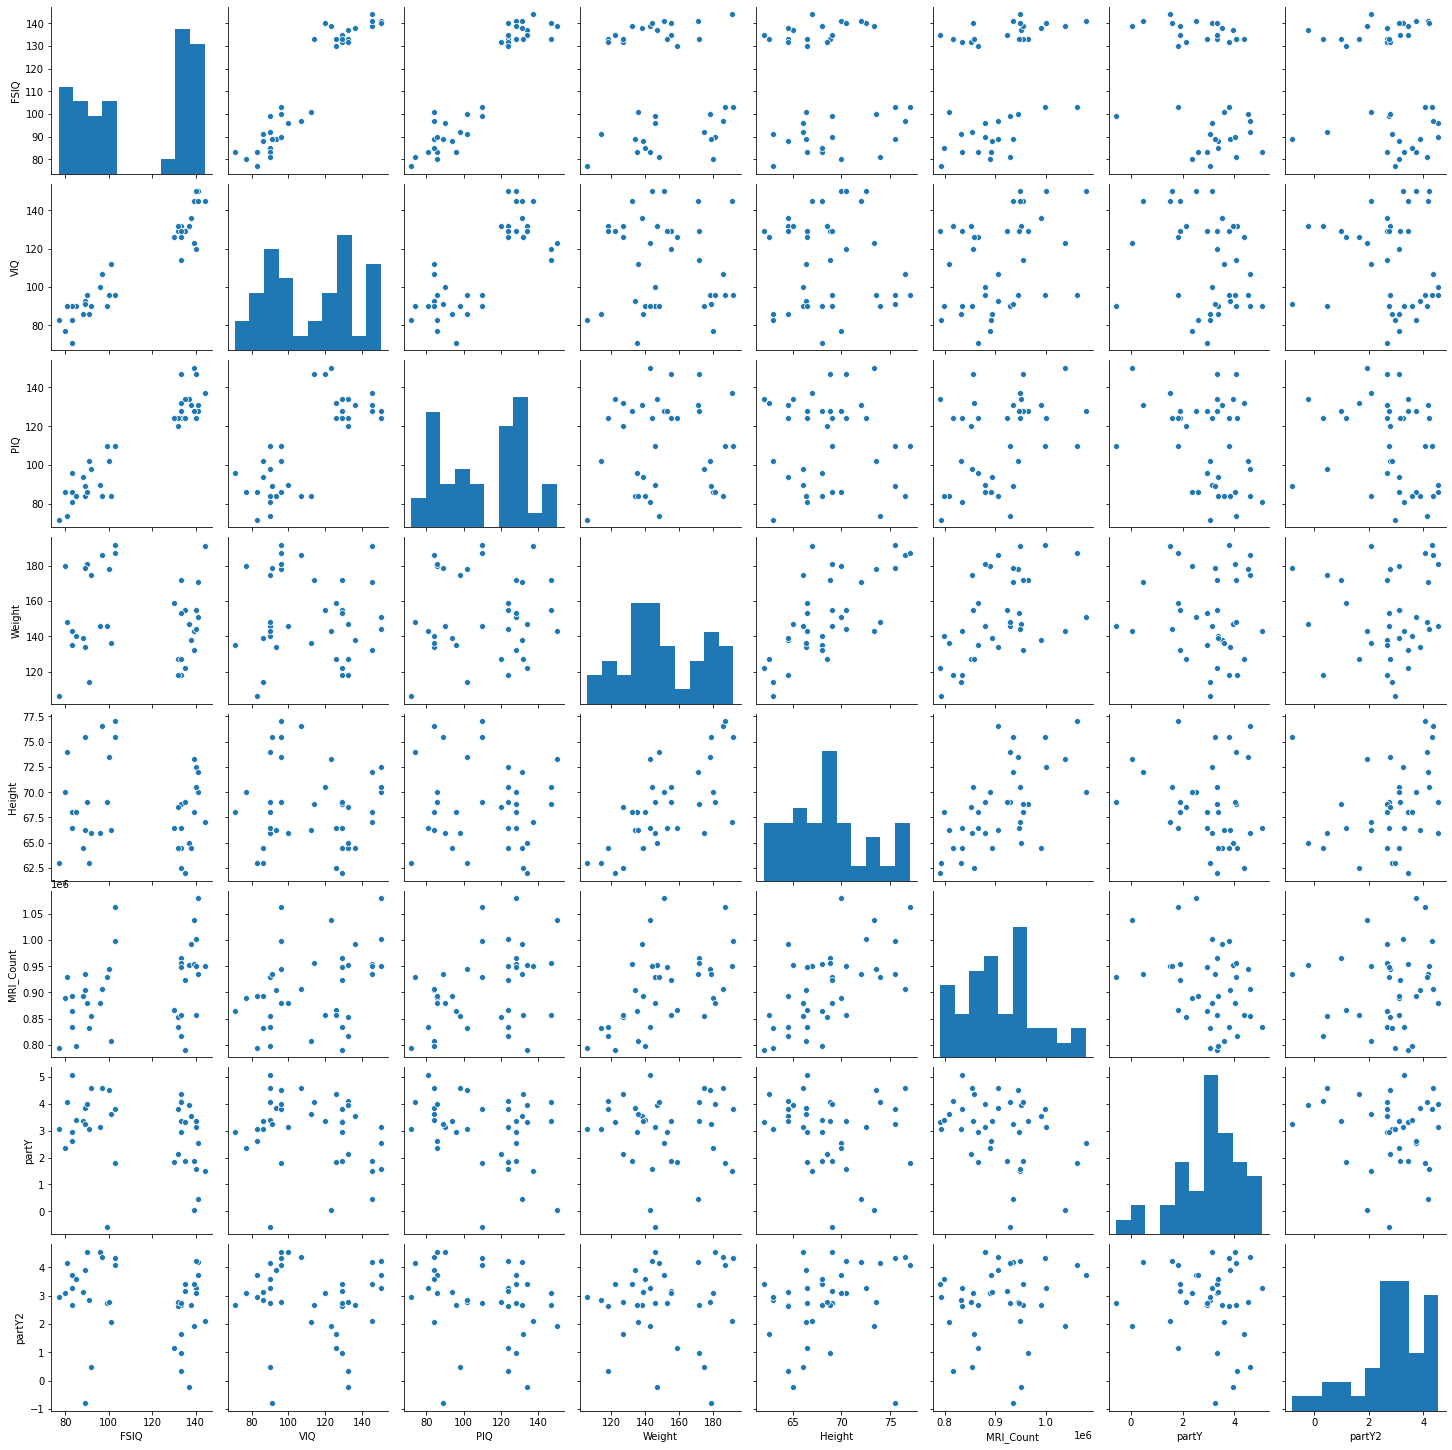

In [102]:
#sns.pairplot(bs_data, hue='Gender')
sns.pairplot(bs_data, diag_kind='hist')

In [106]:
model = dict()
for idx, feature in enumerate(bs_data.columns[range(1,bs_data.columns.shape[0]-1)]):
    model[feature] = ols('partY ~ ' + feature, bs_data).fit()

for mod in model:
    print(mod.summary())


partY


AttributeError: 'str' object has no attribute 'summary'

In [129]:
for mod in model:
    print("{:9s}: {:6.3f}".format(mod,model[mod].f_pvalue))


FSIQ     :  0.057
VIQ      :  0.110
PIQ      :  0.030
Weight   :  0.878
Height   :  0.252
MRI_Count:  0.029
partY    :  0.000


model = ols('partY ~ MRI_Count', bs_data).fit()
print(model.summary())

In [103]:
model = ols('partY2 ~ MRI_Count', bs_data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 partY2   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.014
Method:                 Least Squares   F-statistic:                    0.4430
Date:                Sat, 30 May 2020   Prob (F-statistic):              0.510
Time:                        21:36:26   Log-Likelihood:                -66.622
No. Observations:                  40   AIC:                             137.2
Df Residuals:                      38   BIC:                             140.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0507      2.651      0.396      0.6

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb939b60da0>,
      dtype=object)

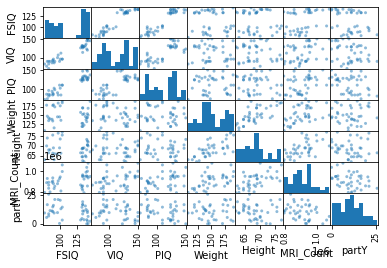

In [36]:
pd.plotting.scatter_matrix(bs_data)

In [42]:
sst.norm(0,1).isf(0.05)

1.6448536269514729